<a href="https://colab.research.google.com/github/yavuzkuk/Change-element-A-B/blob/main/Mnist%20Lenet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten
from keras.models import Sequential
from keras.datasets import mnist

In [40]:
(train_img,train_label),(test_img,test_label) = mnist.load_data()

In [41]:
train_img = train_img/255.0
test_img = test_img/255.0

In [42]:
train_img = train_img.reshape(train_img.shape[0],28,28)
test_img = test_img.reshape(test_img.shape[0],28,28)

In [43]:
from keras.utils.np_utils import to_categorical
model = Sequential()

model.add(Conv2D(filters=6,kernel_size=(5,5),padding="valid",activation="relu",input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=16,kernel_size=(5,5),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(120,activation="relu"))

model.add(Dense(10,activation="softmax"))

model.compile(metrics=["accuracy"],optimizer="adam",loss="categorical_crossentropy")

train_label = to_categorical(train_label)
test_label = to_categorical(test_label)

In [44]:
history = model.fit(train_img,train_label,epochs=20,validation_data=(test_img,test_label))

Epoch 1/20
1875/1875 [==============================] - 41s 20ms/step - loss: 0.1842 - accuracy: 0.9446 - val_loss: 0.0691 - val_accuracy: 0.9786
Epoch 2/20
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0609 - accuracy: 0.9809 - val_loss: 0.0421 - val_accuracy: 0.9865
Epoch 3/20
1875/1875 [==============================] - 38s 20ms/step - loss: 0.0440 - accuracy: 0.9861 - val_loss: 0.0434 - val_accuracy: 0.9872
Epoch 4/20
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0359 - accuracy: 0.9887 - val_loss: 0.0373 - val_accuracy: 0.9870
Epoch 5/20
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0282 - accuracy: 0.9912 - val_loss: 0.0366 - val_accuracy: 0.9894
Epoch 6/20
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0245 - accuracy: 0.9924 - val_loss: 0.0315 - val_accuracy: 0.9908
Epoch 7/20
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0212 - accuracy: 0.9931 - val_loss: 0.0458 -

In [47]:
loss,accuracy = model.evaluate(test_img,test_label)

313/313 [==============================] - 2s 8ms/step - loss: 0.0421 - accuracy: 0.9904


In [48]:
import matplotlib.pyplot as plt

In [60]:
loss = history.history["loss"]
accuracy = history.history["accuracy"]

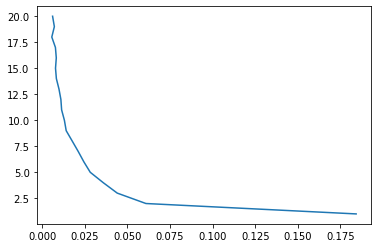

In [61]:
epochs = range(1,21)
plt.plot(loss,epochs)
plt.show()

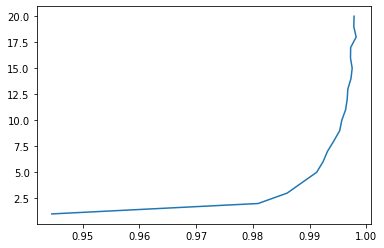

In [62]:
plt.plot(accuracy,epochs)
plt.show()